In [1]:
import os.path as osp
import sys
sys.path.append('tools')
import _init_paths
import caffe
from fast_rcnn.config import cfg, cfg_from_file, cfg_from_list, get_output_dir
import argparse
import code
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
ROOT_DIR = './'
solver_fn = './models/alisc/VGG16/solver.pt'
model_fn = './data/faster_rcnn_models/VGG16_faster_rcnn_final.caffemodel'

In [3]:
cfg_from_file(osp.join(
        './experiments/cfgs/alisc_classification.yml'))
print cfg

{'USE_GPU_NMS': True, 'ROOT_DIR': '/mnt/sdb/xliu102/projects/Image-Retrieval-IFP/py-faster-rcnn', 'GPU_ID': 0, 'EPS': 1e-14, 'RNG_SEED': 3, 'MODELS_DIR': '/mnt/sdb/xliu102/projects/Image-Retrieval-IFP/py-faster-rcnn/models/pascal_voc', 'TRAIN': {'RPN_BBOX_INSIDE_WEIGHTS': [1.0, 1.0, 1.0, 1.0], 'PROPOSAL_METHOD': 'selective_search', 'SNAPSHOT_ITERS': 10000, 'RPN_POST_NMS_TOP_N': 32, 'RPN_PRE_NMS_TOP_N': 12000, 'BBOX_REG': True, 'IMS_PER_BATCH': 1, 'RPN_FG_FRACTION': 0.5, 'BBOX_NORMALIZE_STDS': [0.1, 0.1, 0.2, 0.2], 'BATCH_SIZE': 128, 'ASPECT_GROUPING': True, 'USE_PREFETCH': False, 'BG_THRESH_LO': 0.1, 'FG_THRESH': 0.5, 'MAX_SIZE': 1000, 'BBOX_THRESH': 0.5, 'BG_THRESH_HI': 0.5, 'SCALES': [600], 'BBOX_NORMALIZE_TARGETS': True, 'BBOX_NORMALIZE_TARGETS_PRECOMPUTED': False, 'FG_FRACTION': 0.25, 'BBOX_NORMALIZE_MEANS': [0.0, 0.0, 0.0, 0.0], 'RPN_BATCHSIZE': 32, 'SNAPSHOT_INFIX': '', 'RPN_POSITIVE_WEIGHT': -1.0, 'RPN_NMS_THRESH': 0.7, 'USE_FLIPPED': True, 'BBOX_INSIDE_WEIGHTS': [1.0, 1.0, 1.0,

In [5]:
caffe.set_mode_gpu()
caffe.set_device(0)
# Load solver and copy weights
solver = caffe.SGDSolver(solver_fn)
solver.net.copy_from(model_fn)
solver.net.copy_from('/mnt/sdb/xliu102/projects/MultipleFacetsLearning/models/pretrained_vgg_16.caffemodel')

Preloading Data...
Start Loading Data from CSV File /mnt/sdb/xliu102/data/ALISC/train_cat_short.txt
Totally 200 rows loaded to parse...
Loading 200 samples Done: Time cost 0.0458250045776 seconds


In [40]:
solver.step(1)

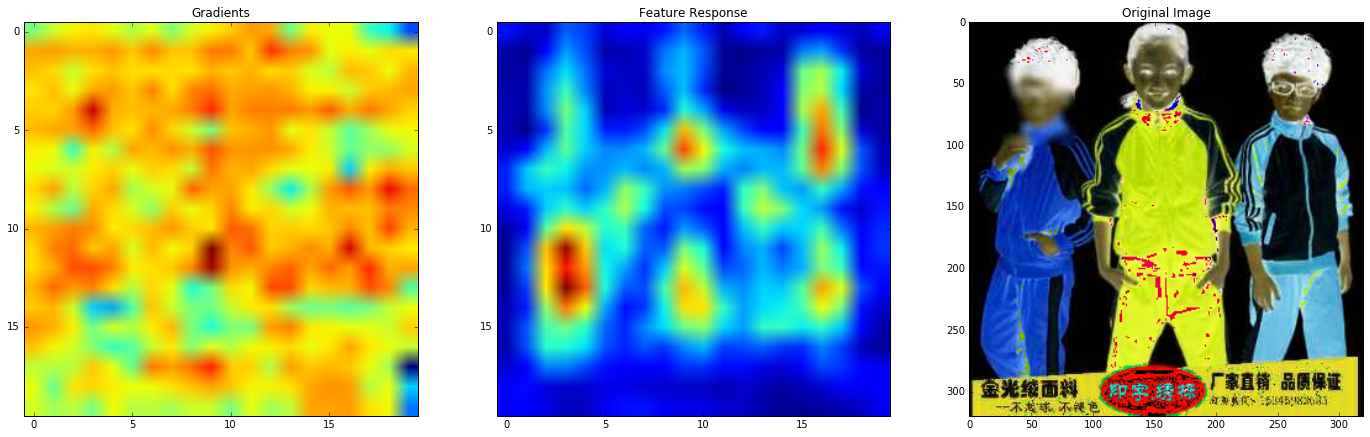

In [41]:
net = solver.net
# show input image and conv5_3 filter output
img = net.blobs['data'].data[0,...].transpose(1, 2, 0)
conv5_map = net.blobs['conv5_3'].data[0, ...]
# show gradients
conv5_3_gradients = net.blobs['conv5_3'].diff[0, ...]
f, axarr = plt.subplots(1, 3, figsize=(24, 8))
axarr[0].imshow(conv5_3_gradients.sum(axis=0))
axarr[0].set_title('Gradients')
axarr[1].imshow(conv5_map.sum(axis=0))
axarr[1].set_title('Feature Response')
axarr[2].imshow(img)
axarr[2].set_title('Original Image')

In [ ]:
# check the PRN scores
rpn_scores = net.blobs['rpn_cls_prob_reshape'].data[0, ...]
f, axarr = plt.subplots(9, 2, figsize=(12, 30))
for i in range(rpn_scores.shape[0]):
    axarr[i/2, i%2].imshow(rpn_scores[i, ...])

(32, 512, 7, 7)


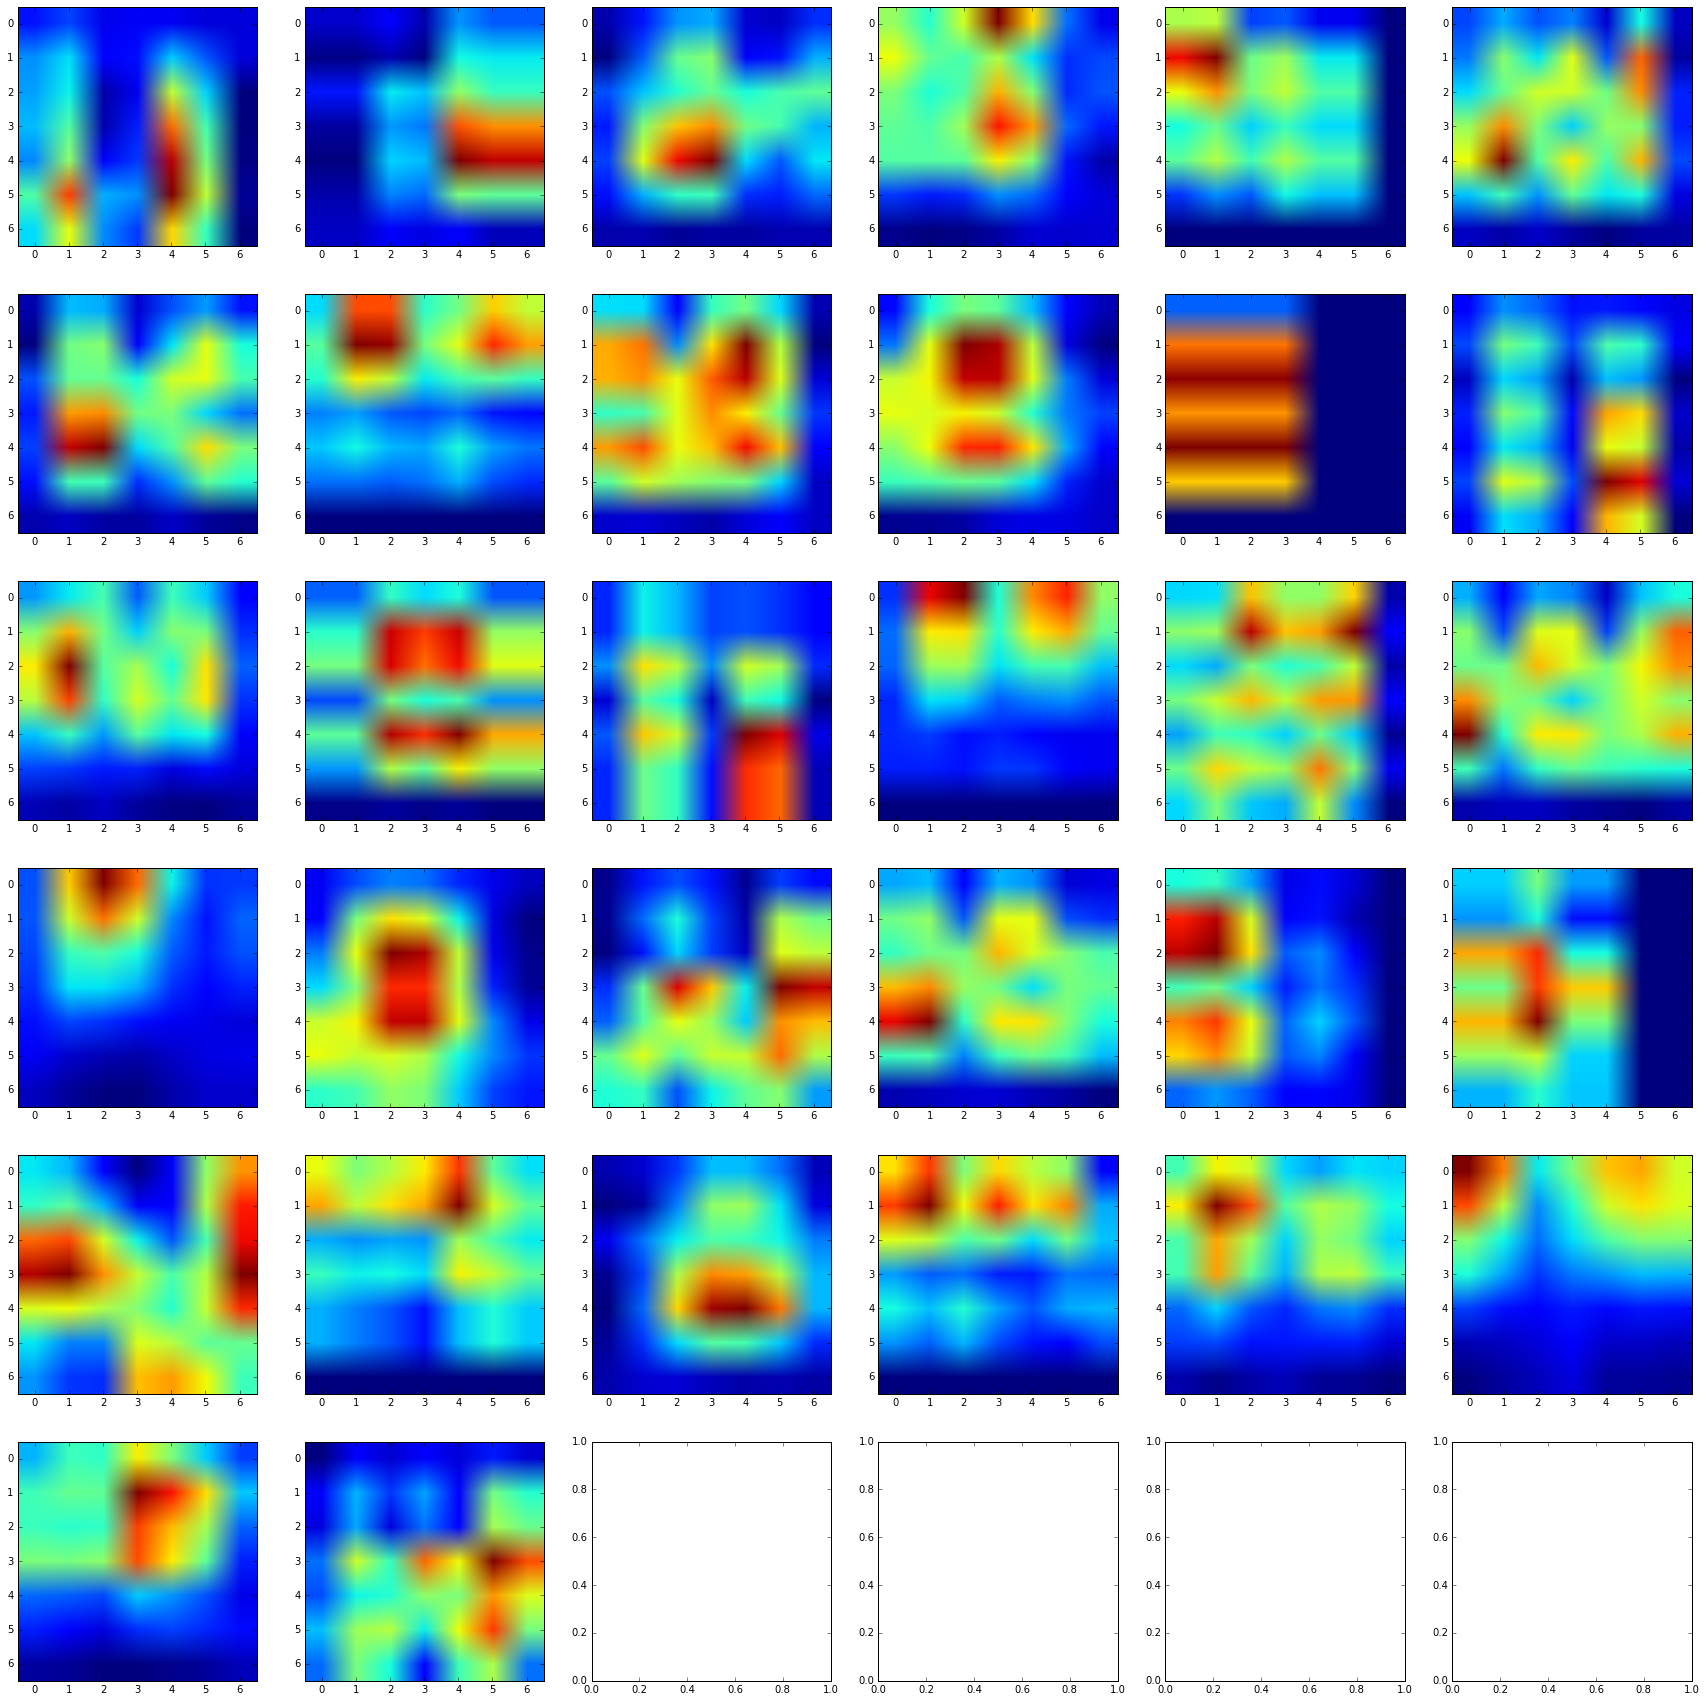

In [45]:
rois_feature = net.blobs['pool5'].data
print rois_feature.shape
f, axarr = plt.subplots(6, 6, figsize=(30, 30))
for i in range(rois_feature.shape[0]):
    axarr[i/6, i%6].imshow(rois_feature[i,...].sum(axis=0))

(32, 512, 7, 7)


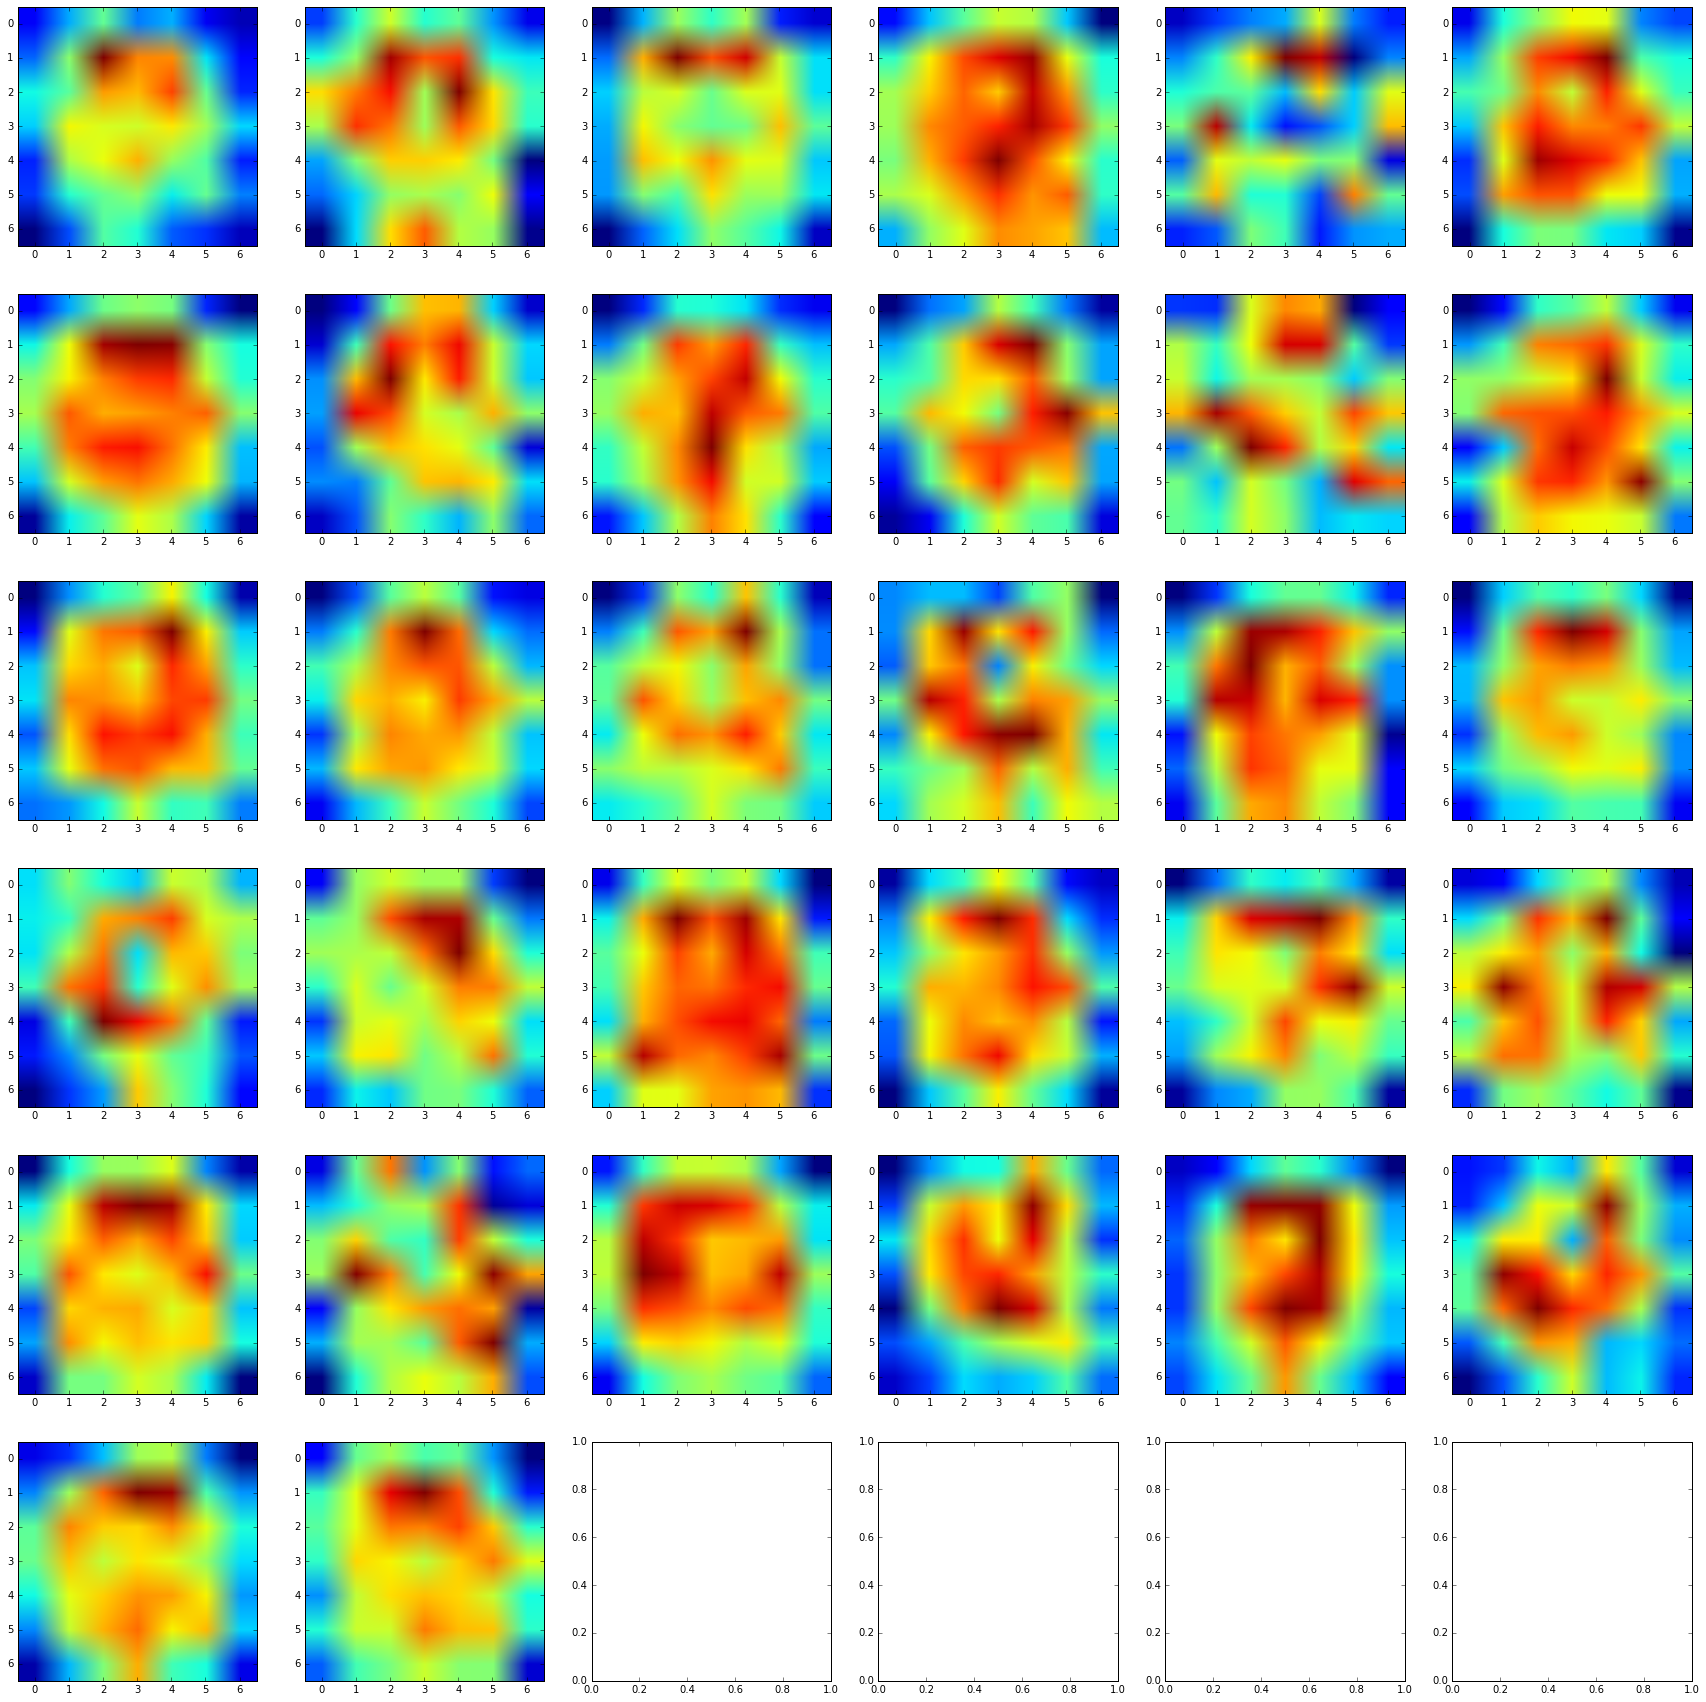

In [44]:
rois_feature = net.blobs['pool5'].diff
print rois_feature.shape
f, axarr = plt.subplots(6, 6, figsize=(30, 30))
for i in range(rois_feature.shape[0]):
    axarr[i/6, i%6].imshow(rois_feature[i,...].sum(axis=0))

loss: 13.5441999435
label: [[[[ 107.]]]]
Classificatio: 121 / 12.2444696426


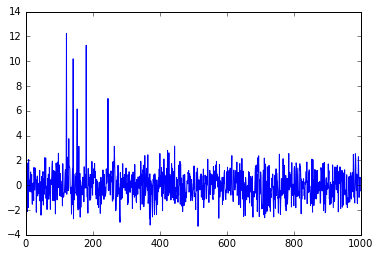

In [46]:
import numpy as np
# show classification results
cls = net.blobs['batch_pooled_cls_score'].data[0, ...]
plt.plot(cls)
print("loss: {}".format(net.blobs['cls_loss'].data))
print("label: {}".format(net.blobs['label'].data))
max_id = np.argmax(cls)
print("Classificatio: {} / {}".format(max_id, cls[max_id]))